In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
cd ../data

C:\Users\drewh\Documents\Flatiron Documents\Phase 2\Housing-Sales-Analysis\data


In [3]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 5CA0-02C2

 Directory of C:\Users\drewh\Documents\Flatiron Documents\Phase 2\Housing-Sales-Analysis\data

10/24/2022  11:41 AM    <DIR>          .
10/24/2022  02:10 PM    <DIR>          ..
10/24/2022  11:41 AM             1,841 column_names.md
10/24/2022  11:41 AM         2,837,124 kc_house_data.csv
               2 File(s)      2,838,965 bytes
               2 Dir(s)  24,447,803,392 bytes free


In [4]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Let's see what information we have:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Do we have any nulls?

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Looks like we have nulls in a handful of columns. Let's take a closer look and see what's going on.

In [7]:
df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

It's seems most likely that these nulls are mostly not waterfront - waterfront properties would almost certainly be sure to identify themselves as such. Let's go ahead and assign that.

In [8]:
df["waterfront"] = df["waterfront"].fillna("NO")

In [9]:
#Sanity check
df["waterfront"].isna().sum()

0

Let's do the same with the view column - there's just a handful of missing values there, but it's still worth clearing up.

In [10]:
df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Similarly, it's most likely the null values don't have a view, like the majority of houses. Let's set that.

In [11]:
df["view"] = df["view"].fillna("NONE")

In [12]:
#Sanity check
df["view"].isna().sum()

0

Finally, let's look at the yr_renovated column, which also has quite a few nulls.

In [13]:
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We have noticeably few houses with documented renovations. This column doesn't seem helpful with such sparse data; let's simply drop it.

In [14]:
df.drop("yr_renovated", axis=1, inplace=True)

Now let's look for potential mistakes in other columns; we'll define some functions for repeated use and see what we're working with.

In [15]:
def hist(df, column):
    return plt.hist(x=df[column])
def hist_rooms(df, column):
    return plt.hist(x=df[column], bins=np.linspace(1, df[column].max()))
def extreme(df, column):
    return df.loc[df[column] == df[column].max()]

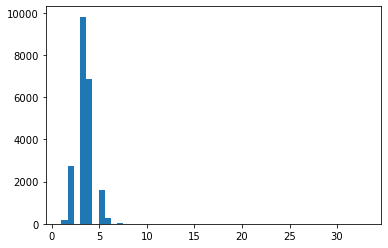

In [16]:
hist_rooms(df, "bedrooms");

Yikes, does a house really have thirty bedrooms?

In [17]:
extreme(df, "bedrooms")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [18]:
#No way - and a google of the house's ID reveals this house only has three bedrooms - let's clean that up
df["bedrooms"].replace(to_replace=33, value=3, inplace=True)

In [19]:
df["bedrooms"].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

There's still some suspicious numbers, albeit less egregious. Let's take a look at the 11.

In [20]:
df.loc[df["bedrooms"] == 11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.0,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600.0,1918,98106,47.556,-122.363,1420,4960


Looking into this house, it appears this house actually has four bedrooms. Let's adjust that.

In [21]:
df["bedrooms"].replace(to_replace=11, value=4, inplace=True)

Much more reasonable - let's repeat the process with the other columns

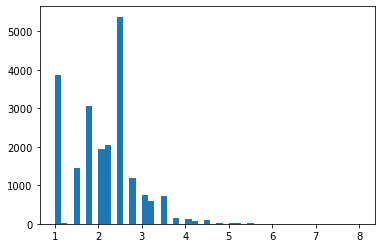

In [22]:
hist_rooms(df, "bathrooms");

In [23]:
extreme(df, "bathrooms")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,98102,47.6298,-122.323,3940,8800
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,9410,4130.0,1999,98053,47.6675,-121.986,4850,217800


This is lots of bathrooms, but both houses are very large, so they're not unreasonable.

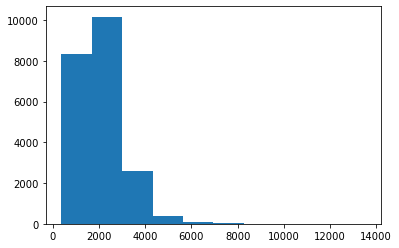

In [38]:
hist(df, "sqft_living");

Suspicious. Let's look into the biggest house.

In [25]:
extreme(df, "sqft_living")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,9410,4130.0,1999,98053,47.6675,-121.986,4850,217800


Understandably, the largest house also is tied for most bathrooms - no problems here, it seems.

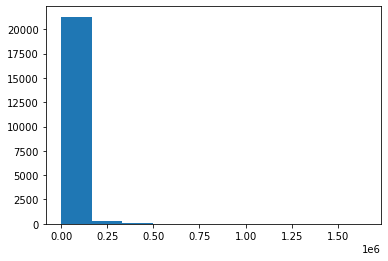

In [26]:
hist(df, "sqft_lot");

In [27]:
extreme(df, "sqft_lot")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,NO,GOOD,Good,6 Low Average,1300,0.0,1920,98022,47.2313,-122.023,2560,425581


A search reveals this is a farm, which is unusual, but valid.

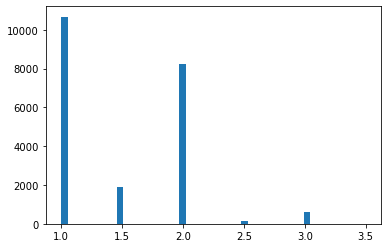

In [28]:
hist_rooms(df, "floors");

In [39]:
#Set the conditions in order of quality so we can clearly see the shape
conditions = ["Poor", 'Fair', 'Average', 'Good', 'Very Good']
con_count = []
for x in conditions:
    con_count.append(df["condition"].value_counts()[x])

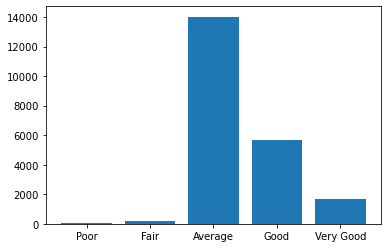

In [30]:
plt.bar(x=conditions, height=con_count);

In [40]:
#Repeating the process with grades
grades = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good',
          '11 Excellent', '12 Luxury', '13 Mansion']
grade_count = []
for x in grades:
    grade_count.append(df["grade"].value_counts()[x])

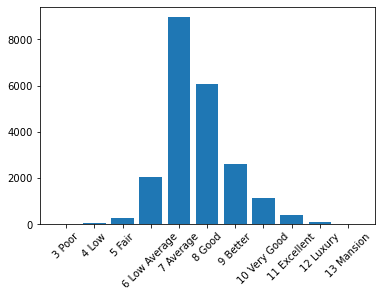

In [41]:
#For legibility, we'll do this one manually
plt.bar(x=grades, height=grade_count)
plt.xticks(rotation = 45);

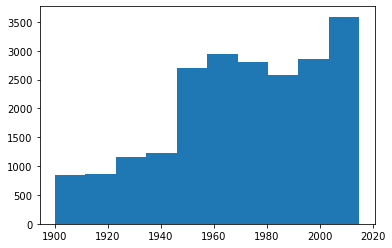

In [33]:
hist(df, "yr_built");

Everything else seems normal. With the data cleaned, let's take a closer look.

## What do we do with the datesssss

In [34]:
df["id"].value_counts().head(177)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
8161020060    2
1432400120    2
7701960990    2
1788900230    2
537000416     1
Name: id, Length: 177, dtype: int64

In [35]:
df.loc[df["id"] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NO,NONE,Fair,5 Fair,1080,0.0,1950,98168,47.5045,-122.33,1070,6250


In [36]:
df["date"] = pd.to_datetime(df["date"])

In [37]:
df.loc[df["date"] == df["date"].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,NO,NONE,Very Good,8 Good,2440,1310.0,1924,98115,47.6747,-122.303,2170,4590
